#### 42/44. Good job. 

In [262]:
#python version 3.11.4  conda version 23.7.3


In [315]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.24.3
import sklearn # v 0.0.3
import pmdarima as pm # v 2.0.3
import statsmodels.api as sm # v 0.14.0
import matplotlib.pyplot as plt # 3.7.1
import sweetviz as sv # 2.2.1
import pytest_warnings as ww #v 0.3.1
import warnings as w
import statsmodels.tsa.stattools as stattools  # v 0.14.0
import matplotlib.pyplot as plt # 3.7.1



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller # v 0.14.0
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.14.0
from statsmodels.tsa.arima_model import ARIMA # v 0.14.0

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.model_selection import KFold

In [316]:
ld = pd.read_csv(r"/Users/thomassniezek/Downloads/loan_default_data_set.csv")#r tells it to run row file path

In [317]:
ld.shape, ld.columns, ld.dtypes # this code tells how many columns there are, the names of the columns and the type each column is. It also says how many rows,in this case, there are 20000. 21 columns 


((20000, 21),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
        'Def_ind'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_past_due      float64
 num_inq_12_month                     int64
 num_c

In [318]:
ld[ld.tot_balance<ld.avg_bal_cards]#finds rows where this is true, your total balance should not be smaller than credit cards balance beacuse credit card balance is included in total balance

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
6522,0.0,4736.516393,377,165,340,0,0,0,0.0,0,...,0,0,0.45004,0.435943,0.311827,0.53592,0,229338.8875,college,0


In [319]:
ld.head()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.1101,14819.05740,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.7258,18951.93455,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.9174,15347.92969,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.5369,14050.71334,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.8017,14858.51527,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0


In [320]:
ld.tail()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0,0,0.535628,0.634712,0.527230,0.602345,0,NaN,high_school,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0,0,0.464774,0.450030,0.545108,NaN,1,NaN,high_school,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0,0,0.264544,0.340289,0.412155,NaN,0,157706.15810,college,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0,0,0.609226,0.582007,0.301612,0.697052,1,97387.97414,college,1
19999,107338.82070,7942.952546,325,195,302,0,0,0,0.000000,0,...,0,0,0.358067,0.435511,0.349246,NaN,0,165447.16380,college,0


In [321]:
my_report = sv.analyze(ld)

                                             |      | [  0%]   00:00 -> (? left)

In [322]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [270]:
#sklearn.model_selection.Kfold # does k fold validation testing
#sklearn.model_selection.LeaveOneOut 

In [271]:
# 3 different variables contain missing values. These variables are rep_education, missing 1 value, rep_income missing 1559 values (8%), and pct_card_over_50 missing 1958 values(10%)
# I chose to use the mean of the data to fill these missing values and the mode for education


In [272]:
ld['Def_ind'].value_counts(normalize=True) #shows the y is not balanced. one is .9 and the other is .1

0    0.9
1    0.1
Name: Def_ind, dtype: float64

In [273]:
mean_rep_income = ld['rep_income'].mean()
mean_pct_card_over_50 = ld['pct_card_over_50_uti'].mean()
mode_rep_education = ld['rep_education'].mode().iloc[0]

# finds the mode and mean for the variables and assigns it to its own variable

In [274]:
# Fill missing values in the specified columns with their respective means
ld['rep_income'].fillna(mean_rep_income, inplace=True)
ld['pct_card_over_50_uti'].fillna(mean_pct_card_over_50, inplace=True)
ld['rep_education'].fillna(mode_rep_education, inplace=True)
#fills all of the none values with the variables we just created in the code before. 

In [275]:
my_report = sv.analyze(ld)

                                             |      | [  0%]   00:00 -> (? left)

In [203]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [276]:
#in this data, graduate is underrepresented as well as other and a little bit highschool. Graduate makes up 12% and highschool makes up 27% comapred to colleges 61%

In [277]:
#rep_income looks approximately normal although it could be skewed from the choice of me making the data use the mean for any N/A values. It may make it appear more normal than it actual is. 

In [278]:
default_by_education = ld.groupby('rep_education')['Def_ind'].mean().reset_index() #find the mean percentage of peopel that default for each variable. 

In [279]:
print(default_by_education) #prints the previous line of code

  rep_education   Def_ind
0       college  0.096968
1      graduate  0.081879
2   high_school  0.115732
3         other  0.077465


In [280]:
#It appears that high_school are most likely to default on loans as they are about 2% more likely than any other group 

In [281]:
#There looks to be multicollinearity between several variables such as num_acc_30d_past_due_12_months and 
# tot_amount_currently_past_due. tot_amount_currently_past_due is also strongly correlated with 
#num_acc_30d_past_due_6_month and num_mortgage_currently_past_due. You can see this by looking at the coorelation ratio in sweetviz

In [282]:
#num_inq_12_month is also strongly coorelated with num_card_inq_24_month. You can see this by looking at the correlation ratio in the sweetviz. 

#### You are not explaining what  the code in the cells below is achieving. (-2)

In [286]:
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use drop='first' to avoid multicollinearity
string_encoded = encoder.fit_transform(ld[['rep_education']])

In [287]:
feature_names = encoder.get_feature_names_out(input_features=['rep_education'])

In [288]:
string_encoded_ld = pd.DataFrame(string_encoded, columns=feature_names)

In [289]:
ld = pd.concat([ld, string_encoded_ld], axis=1)

In [290]:
X = ld.drop(['rep_education', 'Def_ind'], axis=1)  # Exclude the original string column
y = ld['Def_ind']  # sets the y value

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [306]:
model = LogisticRegression(solver= 'saga', max_iter =10000) #creates the logistic regression class, 

In [307]:
model.fit(X_train,y_train) #fits the training group

LogisticRegression(max_iter=10000, solver='saga')

In [309]:
y_pred = model.predict(X_test)

In [310]:
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred, average='weighted')  # chose weighted becasue it calculates metrics for each class and takes the mean with class weights based on support.
recall2 = recall_score(y_test, y_pred, average='weighted')
confusion2 = confusion_matrix(y_test, y_pred)

In [311]:
print(f"Accuracy: {accuracy2:.6f}") #prints each one and makes it have 6 significant figures. 
print(f"Precision: {precision2:.6f}")
print(f"Recall: {recall2:.6f}")
print("Confusion Matrix:")
print(confusion2)

Accuracy: 0.907667
Precision: 0.891826
Recall: 0.907667
Confusion Matrix:
[[5374   28]
 [ 526   72]]


In [ ]:
#the accuracy measures the proportion of correctly predicted instances out of the total instances so in this case 90.8%
#Precision measures the proportion of true positive predictions among all positive predictions so in this case 89.2%
# Recall measures the proportion of true positive predictions among all actual positive instances so in this case 90.8% as well. 

In [ ]:
#Although, it is not a great measure as the data is imbalanced. It would be better for us to do something like k fold for validation as it is better for imbalanced datasets. 

In [ ]:
#This matrix represents the counts of true positive (5374), true negative (72), false positive (28), and false negative (526) predictions made by the model. It appears to be a decent model. 

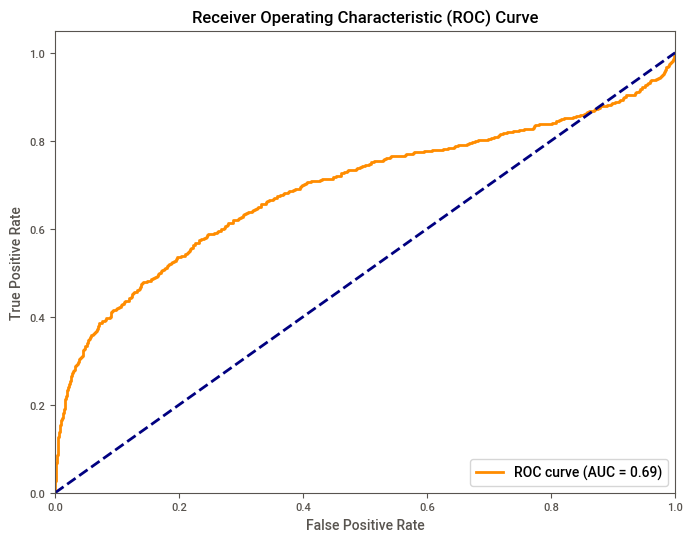

In [314]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [344]:
coefficients = model.coef_[0]

# Create a DataFrame to associate feature names with coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Calculate the absolute values of coefficients for ranking
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])

# Sort the DataFrame by absolute coefficient values in descending order
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the coefficients
print(coef_df)

                            Feature   Coefficient  Abs_Coefficient
2                        credit_age -1.652848e-03     1.652848e-03
4                   credit_card_age -1.182180e-03     1.182180e-03
3           credit_age_good_account -6.441044e-04     6.441044e-04
8     tot_amount_currently_past_due  2.593600e-04     2.593600e-04
1                     avg_bal_cards -1.282726e-04     1.282726e-04
10            num_card_inq_24_month  7.567977e-05     7.567977e-05
9                  num_inq_12_month  5.015320e-05     5.015320e-05
5    num_acc_30d_past_due_12_months  1.557293e-05     1.557293e-05
13                    uti_open_card  1.040817e-05     1.040817e-05
14                  pct_over_50_uti  8.004891e-06     8.004891e-06
16             pct_card_over_50_uti  7.988303e-06     7.988303e-06
15              uti_max_credit_line  7.843123e-06     7.843123e-06
17                          ind_XYZ -7.353441e-06     7.353441e-06
11                num_card_12_month  5.350773e-06     5.350773

In [ ]:
# It appears that the two most important features in predicting default status are credit_age and credit_card_age

In [323]:
pp = pd.read_csv(r"/Users/thomassniezek/Downloads/mobile_phone_prices.csv")#r tells it to run row file path

In [324]:
pp.shape, pp.columns, pp.dtypes # this code tells how many columns there are, the names of the columns and the type each column is. It also says how many rows,in this case, there are 2000. 21 columns 

((2000, 21),
 Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
        'four_g', 'int_memory', 'mobile_depth', 'mobile_weight',
        'number_of cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
        'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
       dtype='object'),
 battery_power        int64
 bluetooth            int64
 clock_speed        float64
 dual_sim             int64
 front_camera         int64
 four_g               int64
 int_memory           int64
 mobile_depth       float64
 mobile_weight        int64
 number_of cores      int64
 pc                   int64
 px_height            int64
 px_width             int64
 ram                  int64
 sc_h                 int64
 sc_w                 int64
 talk_time            int64
 three_g              int64
 touch_screen         int64
 wifi                 int64
 price_range          int64
 dtype: object)

In [325]:
pp.head

<bound method NDFrame.head of       battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0               842          0          2.2         0             1       0   
1              1021          1          0.5         1             0       1   
2               563          1          0.5         1             2       1   
3               615          1          2.5         0             0       0   
4              1821          1          1.2         0            13       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      int_memory  mob

In [326]:
pp.tail

<bound method NDFrame.tail of       battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0               842          0          2.2         0             1       0   
1              1021          1          0.5         1             0       1   
2               563          1          0.5         1             2       1   
3               615          1          2.5         0             0       0   
4              1821          1          1.2         0            13       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      int_memory  mob

In [327]:
pp.isna().sum() #Checks for null values

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
int_memory         0
mobile_depth       0
mobile_weight      0
number_of cores    0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [328]:
my_report2 = sv.analyze(pp)

                                             |      | [  0%]   00:00 -> (? left)

In [329]:
my_report2.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [330]:
# The variables are about evenly split between the wifi, touchscreen and price range. 3G is not the moost evenly split. Front camera is left right skewed. 

In [331]:
pp.describe() #This returns the summary like statistics including the count, mean, standard deviation min and values at 25%, 50%, 75% and the max value

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [332]:
y2 = pp['price_range'] #sets the y as median house value

In [333]:
X2= pp.loc[:, pp.columns != 'price_range'] #Says that I want all of the values except for price_range


In [334]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=6)

In [335]:
model2 = LinearDiscriminantAnalysis() #creates the LDA class

In [336]:
model2.fit(X2_train, y2_train)

LinearDiscriminantAnalysis()

In [337]:
y2_pred = model2.predict(X2_test)

In [338]:
model2.coef_ #coefficient for each column

array([[-7.75766146e-03,  6.52690991e-02,  2.77654797e-01,
         4.45918636e-01, -7.63152357e-03,  7.32492376e-02,
        -6.96676951e-03,  3.96827441e-01,  1.45700204e-02,
         4.51046559e-02, -1.85993645e-02, -4.17913066e-03,
        -4.12132753e-03, -1.41115929e-02, -2.03568473e-02,
         2.42540827e-02, -3.97520133e-02, -5.05274384e-01,
        -3.34917855e-02,  3.69300144e-01],
       [-2.23921799e-03,  4.39302091e-02, -7.52362326e-03,
         1.10597035e-01,  7.93850412e-03,  8.78810785e-02,
         9.24261914e-04,  2.99338291e-01,  3.84217977e-03,
        -3.50970343e-02, -1.39969451e-02, -1.05426539e-03,
        -1.12904758e-03, -4.47591560e-03, -1.58899579e-02,
        -2.04629527e-03,  2.48586580e-04, -2.24598070e-01,
         6.05678878e-02,  8.89844718e-02],
       [ 2.04787669e-03, -6.41119395e-02, -6.69803212e-02,
        -1.86986589e-01,  1.74468366e-02, -1.35209040e-01,
        -2.19348232e-03, -2.20715233e-01, -1.43920924e-03,
         1.63182301e-02,  1.8

In [339]:
pp['price_range'].value_counts(normalize=True) #shows the y is balanced. 

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

In [340]:
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, average='weighted')  # chose weighted becasue it calculates metrics for each class and takes the mean with class weights based on support.
recall = recall_score(y2_test, y2_pred, average='weighted')
confusion = confusion_matrix(y2_test, y2_pred)

In [341]:
print(f"Accuracy: {accuracy:.6f}") #prints each one and makes it have 6 significant figures. 
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.938333
Precision: 0.940363
Recall: 0.938333
Confusion Matrix:
[[137   3   0   0]
 [  3 151   8   0]
 [  0  10 138   1]
 [  0   0  12 137]]


In [342]:
# Accuracy measures the proportion of correctly predicted instances out of the total instances so in this case 94%
#Precision measures the proportion of true positive predictions among all positive predictions so in this case 94%
# Recall measures the proportion of true positive predictions among all actual positive instances so in this case 94% as well. 

In [343]:
#the diagonals represents how many were correctly predicted by the model.
#These are all high values compared to the not correctly predicted. 
# The one that strayed the most was the model predicted 12 as '3' instead of '4'
#This along with the high precision and accuracy makes it a decent model